本章主要内容：

* LMS算法简介
* 无约束最优化简介
* 最速下降法
* LMS算法实现与训练

# 3.1 LMS算法简介

Rosenblatt感知器是第一个用于分类任务的神经网络模型。而由Widrow和Hoff（1960）提出的最小均方算法（Least mean square，LMS）是第一个使用神经网络模型完成回归任务的算法。同时LMS算法也可作为其他回归算法的评价标准。

LMS算法与Rosenblatt感知器类似，但结构更为简单，可以看做是一个神经元构成的Rosenblatt感知器去掉了激活函数的形式。这样使得神经元的输出成为了连续值，等价于神经元的输入与输出之间进行了线性变换。模型利用矩阵形式表示如下：

$$y=\mathbf{w}^\mathrm{T}\mathbf{x}$$

其中$\mathbf{w}$表示模型参数，包括连接权重（突触权值）与阈值（偏置值），$\mathbf{x}$表示为模型输入，$x_0=1$。

模型的输出$y$与期望值（标记）$d$之间的误差为：

$$e=d-y$$

误差可以用于调整模型参数。具体的调整方式与代价函数有关。一般的，我们使用均方误差代价函数，如下：

$$J(\mathbf{w})=\frac{1}{2N}\sum_{i=1}^{N}e_i^2=\frac{1}{2N}\sum_{i=1}^{N}(d(i)-\mathbf{w}^\mathrm{T}\mathbf{x}(i))^2$$

其中$N$表示样本总数，$i$表示样本索引。注意，代价函数中自变量成为了$\mathbf{w}$，这是因为在样本已知的情况下，我们估计模型中的参数，参数就成为了自变量，代价函数最前面乘以了$\frac{1}{2}$是为了求梯度方便。LMS算法最早使用在自适应滤波中（自适应是指能够随着时间推移自动修改权值），此时$i$可以看做是某一个时刻，所以所以LMS算法的代价函数为：

$$J(\mathbf{w})=\frac{1}{2}e^2_{i}=\frac{1}{2}(d(i)-\mathbf{w}^{\mathrm{T}}\mathbf{x}(i))^2$$

LMS算法使用**随机梯度下降法**求解参数，也就是说在训练中每次只计算一个样本（时刻）的代价，并使用对应的梯度来更新参数，如下：

$$\frac{\partial{J}}{\partial{\mathbf{w}}}
=-\mathbf{x}(i)(d(i)-\mathbf{w}^{\mathrm{T}}\mathbf{x}(i))
=-\mathbf{x}(i)e(i)
$$

所以LMS算法流程如下：

---

训练样本：

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;输入信号向量$=\mathbf{x}(i)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;期望响应$=d(i)$

学习率：$\eta$

计算：当$i=1, 2,...,$计算

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\partial{J}/{\partial{\mathbf{w}}}=-\mathbf{x}(i)e(i)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathbf{w}(i+1)=\mathbf{w}(i)+\eta\mathbf{x}(i)e(i)$


---

**注意**：前向传播时，输入样本属性计算模型的输出，此时认为模型的参数是确定的，输入$\mathbf{x}$是变量。当计算模型代价并更新参数时，此时认为输入的样本属性是确定的，参数$\mathbf{w}$是变量。


# 3.2 无约束最优化

考虑代价函数$J(\mathbf{w})$，它是一个对未知参数向量$\mathbf{w}$连续可微的函数。函数$J(\mathbf{w})$映射$\mathbf{w}$的元素为实数。我们想找到最优解$\mathbf{w}^*$满足条件

$$J(\mathbf{w}^*)\leq J(\mathbf{w})$$

也就是说需要解决一个无约束的优化问题，即选择适当的权值向量$\mathbf{w}$最小化代价函数$J(\mathbf{w})$。最优胜的必要条件是：

$$\nabla J(\mathbf{w}^*)=0$$

这里$\nabla$是梯度算子，

$$\nabla=\left[\frac{\partial}{\partial{w_1}}, \frac{\partial}{\partial{w_2}},...,\frac{\partial}{\partial{w_M}}\right]^{\mathrm{T}}$$

同时$\nabla J(\mathbf{w})$是代价函数的梯度向量，

$$\nabla J(\mathbf{w})=
\left[\frac{\partial J}{\partial{w_1}}, \frac{\partial J}{\partial{w_2}},...,\frac{\partial J}{\partial{w_M}}\right]^{\mathrm{T}}
$$

很多神经网络模型适用一种以局部迭代下降的无约束最优化法。其基本思想如下：

从一个初始估计值$\mathbf{w}(0)$开始，产生一系列权值向量$\mathbf{w}(1), \mathbf{w}(2),...$，使得代价函数$J(\mathbf{w})$在算法的每次迭代中都要下降，即

$$J(\mathbf{w}(i+1)) < J(\mathbf{w}(i))$$

其中$i$表示迭代的索引。

我们希望算法最终收敛到最优解$\mathbf{w}$，但并不总能做到，有时候算法会发散。接下来，我们简介几种以迭代思想完成无约束最优化的方法。

# 3.3 最速下降法

**最速下降法**也被称为**梯度下降法（Gradient Descent，GD）**，使用最速下降法迭代求极值时，每次对权值向量$\mathbf{w}$的调整都是在最速下降的方向进行的，即它是与梯度向量$\nabla J(\mathbf{w})$方向相反的，为了表示方便，记为：

$$\mathbf{g} = \nabla J(\mathbf{w})$$

所以最速下降法更新参数的规则为：

$$\mathbf{w}(i+1)=\mathbf{w}(i)-\eta \mathbf{g}(n)$$

这里$\eta$是一个正数，称为步长或学习率，用于控制更新参数的幅度。

为了理解最速下降法，我们将最速下降法迭代过程比作下山的过程。在初始阶段，我们随机设置一个初始值$\mathbf{w}(0)$，此时得到的代价$J(\mathbf{w}(0))$的值一般不在极小值点处，就好比我们在一座山的随机一点上，如下图所示：

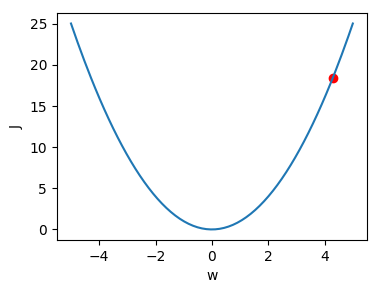

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 3), dpi=100)
plt.xlabel('w')
plt.ylabel('J')
X = np.linspace(-5, 5, 128)
Y = X ** 2
plt.plot(X, Y)
plt.scatter(X[-10], Y[-10], color='red')

图中蓝色曲线表示代价函数的图像，红色的点表示当前位置。由于初始位置是随机的，一般不可能在极小值点处。此时，我们希望代价最小，即希望红点去到曲线的最低点处。

如何做到呢？这与我们下山的过程类似，当我们一眼望不到山的谷底的时候，我们只需要找到当前脚下最陡的方向往下走即可，最陡的方向可以很容易找到，只需要找到当前这一点的切线就能知道了。实际上切线的斜率的正负反映了下降的反方向，斜率绝对值的大小反映了坡度大小。

在上图中红色点所在位置的切线斜率大于0，所以参数$w$的移动方向为朝着横轴的负方向移动，移动的长度取决于斜率绝对值的大小与学习率，可以看到学习率越大，移动步长越大，反之越小；斜率的绝对值越大，移动步长越大，反之越小。迭代一次如下图所示：

Text(4.291338582677165, 18.41558683117366, '')

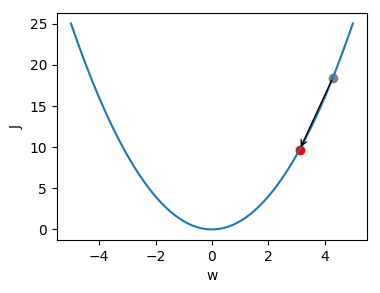

In [2]:
plt.figure(figsize=(4, 3), dpi=100)
plt.xlabel('w')
plt.ylabel('J')
X = np.linspace(-5, 5, 128)
Y = X ** 2
plt.plot(X, Y)
plt.scatter(X[-10], Y[-10], color='grey')
plt.scatter(X[-25], Y[-25], color='red')
plt.annotate("", xy=(X[-25], Y[-25]), xytext=(X[-10], Y[-10]),arrowprops=dict(arrowstyle="->"))

通过多次迭代，代价可能会降低到极小值点或其附近，如下：

Text(0.2755905511811019, 0.07595015190030353, '')

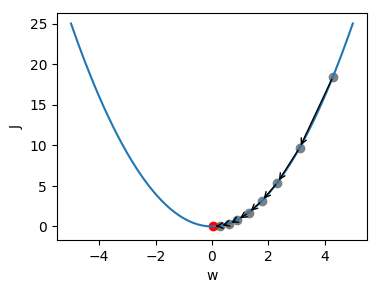

In [3]:
plt.figure(figsize=(4, 3), dpi=100)
plt.xlabel('w')
plt.ylabel('J')
X = np.linspace(-5, 5, 128)
Y = X ** 2
plt.plot(X, Y)
plt.scatter(X[-10], Y[-10], color='grey')
plt.scatter(X[-25], Y[-25], color='grey')
plt.annotate("", xy=(X[-25], Y[-25]), xytext=(X[-10], Y[-10]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-35], Y[-35], color='grey')
plt.annotate("", xy=(X[-35], Y[-35]), xytext=(X[-25], Y[-25]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-42], Y[-42], color='grey')
plt.annotate("", xy=(X[-42], Y[-42]), xytext=(X[-35], Y[-35]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-48], Y[-48], color='grey')
plt.annotate("", xy=(X[-48], Y[-48]), xytext=(X[-42], Y[-42]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-53], Y[-53], color='grey')
plt.annotate("", xy=(X[-53], Y[-53]), xytext=(X[-48], Y[-48]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-57], Y[-57], color='grey')
plt.annotate("", xy=(X[-57], Y[-57]), xytext=(X[-53], Y[-53]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-61], Y[-61], color='grey')
plt.annotate("", xy=(X[-61], Y[-61]), xytext=(X[-57], Y[-57]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-64], Y[-64], color='red')
plt.annotate("", xy=(X[-64], Y[-64]), xytext=(X[-61], Y[-61]),arrowprops=dict(arrowstyle="->"))

需要注意的是，更新参数时设置的步长不能太大，太大可能导致模型无法收敛，步长设置太小也不合适，太小容易使得模型迭代次数太多，收敛速度缓慢。在实际中一般会使用小于 1 的学习率，并从大到小多次尝试以获得合适的学习率。

下图左图展示了学习率较大时，容易引起震荡，右图展示了学习率过大时会导致难以收敛。

Text(-4.606299212598425, 21.217992435984872, '')

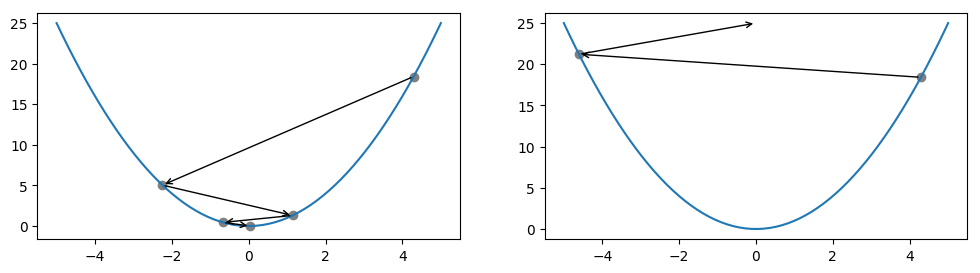

In [4]:
plt.figure(figsize=(12, 3), dpi=100)

plt.subplot(1, 2, 1)

X = np.linspace(-5, 5, 128)
Y = X ** 2
plt.plot(X, Y)
plt.scatter(X[-10], Y[-10], color='grey')
plt.scatter(X[35], Y[35], color='grey')
plt.annotate("", xy=(X[35], Y[35]), xytext=(X[-10], Y[-10]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[-50], Y[-50], color='grey')
plt.annotate("", xy=(X[-50], Y[-50]), xytext=(X[35], Y[35]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[55], Y[55], color='grey')
plt.annotate("", xy=(X[55], Y[55]), xytext=(X[-50], Y[-50]),arrowprops=dict(arrowstyle="->"))

plt.scatter(X[64], Y[64], color='grey')
plt.annotate("", xy=(X[64], Y[64]), xytext=(X[55], Y[55]),arrowprops=dict(arrowstyle="->"))


plt.subplot(1, 2, 2)
X = np.linspace(-5, 5, 128)
Y = X ** 2
plt.plot(X, Y)
plt.scatter(X[-10], Y[-10], color='grey')
plt.scatter(X[5], Y[5], color='grey')
plt.annotate("", xy=(X[5], Y[5]), xytext=(X[-10], Y[-10]),arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0, 25), xytext=(X[5], Y[5]),arrowprops=dict(arrowstyle="->"))

## 批量与小批量算法

很多神经网络算法的代价函数通常可以分解为训练样本上的求和，在利用优化算法如梯度下降法计算参数的每一次更新。准确计算每一次梯度的期望代价非常大，因为需要遍历整个数据集。我们通常使用小批量样本获得梯度的统计估计。这样做是因为使用更多样本来估计梯度的回报是小于线性的，其次由于训练集往往冗余，训练集中大多数样本对梯度做出了非常相似的贡献。这就诞生了小批量算法与随机算法，其解释如下：

* 使用整个训练集的优化算法被称为**批量（batch）**或**确定性（deterministic）**算法。
* **小批量（mini batch）**算法是指使用小批量训练集的优化算法。
* 每次只使用单个样本的优化算法被称为**随机（stochastic）**或**在线（online）**算法。
* 在线算法通常是指从连续产生样本的数据流中抽取样本的情况。
* 随机算法通常是指从固定大小的训练集中遍历多次采样的情况。

一般的，我们认为梯度下降法就是指批量梯度下降法，是使用全部样本计算代价和估计梯度的优化法，小批量梯度下降法是指随机使用数据集的一个固定大小的子集计算代价和估计梯度的优化法，随机梯度下降法是指随机使用数据集中的一个样本计算代价和估计梯度的优化法。

通常我们使用小批量梯度下降法优化模型，使用小批量梯度下降法时需要了解：

* 小批量数据是随机抽取的，要尽量避免连续样本之间具有高度的相关性，通常可以在抽取小批量样本时对样本顺序进行一次打乱。
* 当没有重复使用样本时，小批量数据对梯度的估计是无偏的，即它遵循着真实泛化误差的梯度。

实际中选择小批量的大小时往往需要考虑诸多因素，例如：

* 更大的批量会计算更精确的梯度估计，但是回报却是小于线性的。
* 极小批量通常难以充分利用计算机的多核架构。这促使我们使用一些绝对最小批量，低于这个值的小批量处理不会减少计算时间。
* 如果批量处理中的所有样本都可以并行地处理，那么内存消耗和批量大小会成正比。对于很多硬件设施，这是批量大小的限制因素。
* 在GPU等某些硬件上使用特定大小的批次大小可以更快运行，通常使用2的指数幂作为批量大小，通常大于16小于512。
* 可能是由于小批量在学习过程中加入了噪声，它们会有一些正则化效果(Wilson and Martinez, 2003) 。泛化误差通常在批量大小为1时最好，此时因为梯度估计的高方差，小批量学习的学习率应该设置小一些以保持稳定性。
* 不同的算法使用不同的方法从小批量中获取不同的信息。

**注意**：

1. 有些时候随机梯度下降法也被不严谨的指代小批量梯度下降法。

2. 通常不能证明梯度下降法等优化算法是收敛的，并且没有明确定义的算法停止准则。通常使用如下方法对是否收敛进行判断：
    * 当梯度向量的欧几里得范数达到一个充分小的阈值时；
    * 当迭代的每一个回合的均方误差变化的绝对速度足够小时；
    * 画出代价变化曲线，当曲线变化趋于平缓时。

3. 参数初始化时需要注意，通常使用随机数初始化模型参数，通常不使用全0或其它特定的常数初始化参数，可能存在梯度均为0等使模型无法训练的情况。

## 其它优化算法简介

虽然梯度下降法在很多任务中被验证是有效的，但也拥有一些缺点，例如不同参数的敏感度不同会导致模型在更新时变得极为缓慢，梯度下降法也是一个对超参数学习率极为敏感的算法，学习率过大、过小都会带来问题，这时候就需要付出大量时间调整超参数。为此出现了大量基于梯度下降法的改进算法，取得了一些成果。例如动量方法、自适应学习率法（如AdaGrad、RMSProp、Adam）等。这些算法统称为一阶优化法。一阶优化法是在神经网络模型优化中被使用最广泛的优化法。

除此以外牛顿法、拟牛顿法等方法也是可行的方法，这些方法因使用了泰勒级数的二阶展开式而被称为二阶优化法，这些方法因其计算量大、存在矩阵不可逆等因素在实际中使用的并不多。

# 3.4 LMS算法实现

LMS算法使用了随机梯度下降法作为其优化更新参数的方法。根据上述描述，我们可以完成模型，如下：

In [1]:
def model(X, W, b):
    '''模型

    Args:
        X: 模型输入向量
        W: 模型连接权重向量
        b: 模型的偏置值

    Return:
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b

为了便于测试，我们生成一些数据集，并可视化。这些数据集有两个属性组成。可视化的左图是两个属性构成的图，右图是属性与标记的图，属性进行了降维处理。

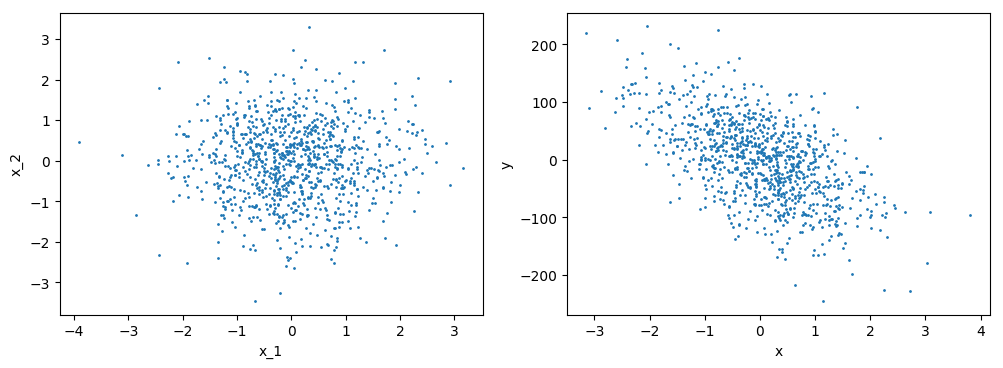

In [6]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np


num_train = 1000
num_test = 100

# 制作数据集
data = make_regression(n_samples=num_train, n_features=2)

# 可视化数据集
plt.figure(figsize=[12, 4], dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(data[0][:, 0], data[0][:, 1], 1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1, 2, 2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')

# 将数据集分割成为训练集与测试集
# 并将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

Text(0, 0.5, 'losses')

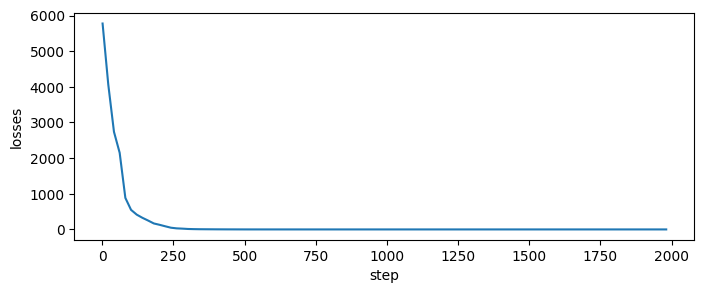

In [14]:
from sklearn.metrics import mean_squared_error as mse


train_steps = 2000    # 训练次数
lr =0.01                    # 学习率
summary_step = 20   # 摘要频率 
summary = []            # 摘要

W = np.random.randn(2)  # 初始化连接权重
b = 0                             # 初始化偏置值
for i in range(train_steps):
    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))

    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    W = W - lr * dW
    db = -1 * (label - out)
    b = b - lr * db

# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')

# 作业

1. 判断题

    * [x] LMS算法中的神经元与Rosenblatt感知器的区别是前者激活函数为线性激活函数，后者为阶跃函数。
    * [ ] LSM算法使用批量梯度下降法优化代价函数并求解模型参数。
    * [x] 最速下降法中的学习率通常是大约0小于1的值。
    * [x] 小批量学习中学习率应该设置小一些（相比于批量学习）以保证稳定性。
    * [ ] 在线算法是指从连续产生样本的数据流中抽取样本，在训练时取小批量样本进行。
    * [ ] 梯度下降法和牛顿法都是一阶优化法。
    * [x] 使用梯度下降法等优化算法求解模型参数时，往往首先需要打乱原始样本数据的顺序。
    * [x] 通常的，小批量算法比批量算法运算迭代一次所需的计算机资源更少。

2. 选择题

    * 关于最小均方算法的说法正确的是（  ABCD  ）
    
        A. 模型由一个神经元构成。
        
        B. 使用优化法可得到模型参数。
        
        C. 模型参数的初始值是随机的。
        
        D. 最小均方算法在更新参数时学习率过大可能导致模型无法收敛。
    
3. 简答题

    * 以下任务分别使用了哪种优化法（批量、小批量、随机/在线优化法）
        * [小批量] 从手写数字数据集MNIST中每次随机抽取32个样本完成一次训练。
        * [在线] 根据用户对购物网站访问实时生成的数据，训练用户对物品偏好的算法。
        * [批量] 从搜集到的100个样本的房价数据集中训练模型估计房价，优化时每次取100个样本。
        
4. 代码练习
    
    * 尝试将上述LMS算法改为使用小批量数据训练。观察并对比收敛速度。